In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [10]:
x, y, z = np.genfromtxt('data/JulianTrajs/alive/cell002.dat', unpack=True)

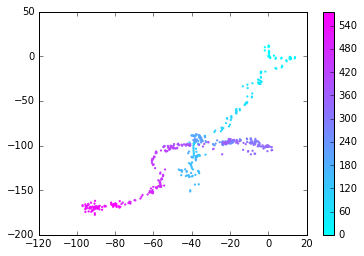

In [11]:
plt.scatter(x, y, c=np.arange(len(x)), cmap='cool', s=5, edgecolor='')
plt.colorbar()

(-200, 200)

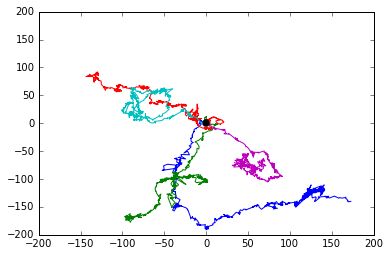

In [30]:
for i in range(1, 6):
    x, y, z = np.genfromtxt('data/JulianTrajs/alive/cell00{}.dat'.format(i), unpack=True)
    plt.plot(x, y)
plt.plot(0, 0, 'ko', markersize=7)
plt.xlim(-200, 200)
plt.ylim(-200, 200)

(-100, 100)

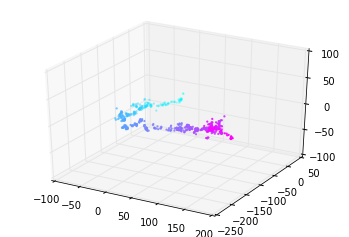

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=np.arange(len(x)), cmap='cool', s=5, edgecolor='')
ax.set_zlim(-100, 100)
#plt.colorbar(ax)

In [140]:
# Read all data files of one category.
import os
data_dir = 'data/JulianTrajs/plastic'
trajectories = []  # dimensions: trajectory index -> time step -> coordinate (x, y, z)
#trajectories_data = []
for filename in os.listdir(data_dir):
    print filename, '->',
    #trajectory_data = np.genfromtxt(os.path.join(data_dir, filename))
    #trajectory = trajectory_data.T
    trajectory = np.genfromtxt(os.path.join(data_dir, filename))
    print trajectory.shape[0], 'time steps'
    trajectories.append(trajectory)
    #trajectories_data.append(trajectory_data)    
trajectories = np.array(trajectories)
# TODO: Split in test/training/validation
#trajectories_data = np.array(trajectories_data)

cell001.dat -> 998 time steps
cell002.dat -> 998 time steps
cell003.dat -> 998 time steps
cell004.dat -> 998 time steps
cell005.dat -> 998 time steps
cell006.dat -> 998 time steps
cell007.dat -> 998 time steps
cell008.dat -> 998 time steps
cell009.dat -> 998 time steps
cell010.dat -> 998 time steps
cell011.dat -> 998 time steps
cell012.dat -> 998 time steps
cell013.dat -> 998 time steps
cell014.dat -> 998 time steps
cell015.dat -> 998 time steps
cell016.dat -> 998 time steps
cell017.dat -> 998 time steps
cell018.dat -> 998 time steps
cell019.dat -> 998 time steps
cell020.dat -> 998 time steps
cell021.dat -> 998 time steps
cell022.dat -> 998 time steps
cell023.dat -> 998 time steps
cell024.dat -> 998 time steps
cell025.dat -> 998 time steps
cell026.dat -> 998 time steps
cell027.dat -> 998 time steps
cell028.dat -> 998 time steps
cell029.dat -> 998 time steps
cell030.dat -> 998 time steps
cell031.dat -> 998 time steps
cell032.dat -> 998 time steps
cell033.dat -> 998 time steps
cell034.da

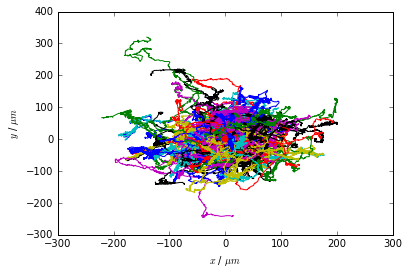

In [141]:
for trajectory in trajectories:
    plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.plot(0, 0, 'ro', markersize=7, mec='none')
plt.xlabel('$x$ / $\mu m$')
plt.ylabel('$y$ / $\mu m$')
plt.savefig('all_plastic.png', dpi=300)

# TODO: Maybe make heatmap

In [112]:
trajectories.reshape(3, -1)

array([[  0.        ,   0.19224073,  -7.6303023 , ..., -49.865305  ,
        -49.339976  , -51.090934  ],
       [  0.        ,   0.66670256,  -0.62110095, ..., -26.359455  ,
        -26.170779  , -23.734934  ],
       [  0.        ,  15.599219  ,  16.956604  , ..., -18.83552   ,
        -27.893268  , -29.065415  ]])

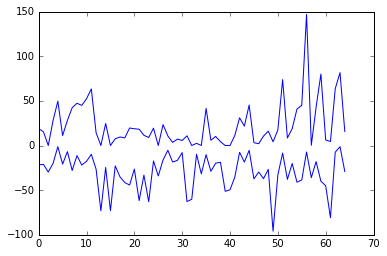

In [113]:
plt.plot(np.min(trajectories, axis=2)[:, 2], 'b')
plt.plot(np.max(trajectories, axis=2)[:, 2], 'b')

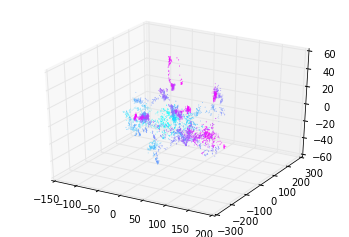

In [124]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for trajectory in trajectories[::10]:
    ax.scatter(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], c=np.arange(len(x)), cmap='cool', s=1, edgecolor='')
#ax.set_zlim(-100, 100)
plt.savefig('all_alive_3D.png', dpi=300)

In [132]:
trajectories[0]

array([[   0.        ,    0.        ,    0.        ],
       [   0.19224073,    1.159683  ,   -1.0741913 ],
       [  -7.6303023 ,    4.5788708 ,  -12.742924  ],
       ..., 
       [ 169.71178   , -139.37348   ,   -6.4971753 ],
       [ 170.10865   , -140.88685   ,   -4.7908792 ],
       [ 172.87403   , -140.08097   ,   -5.8794939 ]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 256, input_length=maxlen))
model.add(LSTM(output_dim=128, activation='sigmoid', inner_activation='hard_sigmoid'))  # TODO: Obviously possible to change LSTM design, how exactly does this work?
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop')

model.fit(X_train, Y_train, batch_size=16, nb_epoch=10)
score = model.evaluate(X_test, Y_test, batch_size=16)